In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('train.csv')

In [3]:
df.head()

,Id,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,PerformanceRating,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,CommunicationSkill,Behaviour
0,1,30,0,Non-Travel,Research & Development,2,3,Medical,571,3,...,3,0,12,2,11,7,6,7,4,1
1,2,36,0,Travel_Rarely,Research & Development,12,4,Life Sciences,1614,3,...,3,2,7,2,3,2,1,1,2,1
2,3,55,1,Travel_Rarely,Sales,2,1,Medical,842,3,...,3,0,12,3,9,7,7,3,5,1
3,4,39,0,Travel_Rarely,Research & Development,24,1,Life Sciences,2014,1,...,3,0,18,2,7,7,1,7,4,1
4,5,37,0,Travel_Rarely,Research & Development,3,3,Other,689,3,...,3,1,10,2,10,7,7,8,1,1


In [4]:
df.shape

(1628, 29)

In [5]:
df.info()   

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1628 entries, 0 to 1627
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Id                       1628 non-null   int64 
 1   Age                      1628 non-null   int64 
 2   Attrition                1628 non-null   int64 
 3   BusinessTravel           1628 non-null   object
 4   Department               1628 non-null   object
 5   DistanceFromHome         1628 non-null   int64 
 6   Education                1628 non-null   int64 
 7   EducationField           1628 non-null   object
 8   EmployeeNumber           1628 non-null   int64 
 9   EnvironmentSatisfaction  1628 non-null   int64 
 10  Gender                   1628 non-null   object
 11  JobInvolvement           1628 non-null   int64 
 12  JobRole                  1628 non-null   object
 13  JobSatisfaction          1628 non-null   int64 
 14  MaritalStatus            1628 non-null  

In [6]:
df.drop(['Id'],axis=1,inplace=True)

In [7]:
df['BusinessTravel'].value_counts()

Travel_Rarely        1105
Travel_Frequently     403
Non-Travel            120
Name: BusinessTravel, dtype: int64

In [8]:
df['Department'].value_counts()

Research & Development    979
Sales                     568
Human Resources            81
Name: Department, dtype: int64

In [9]:
df['EducationField'].value_counts()  

Life Sciences       623
Medical             521
Marketing           197
Technical Degree    162
Other                85
Human Resources      40
Name: EducationField, dtype: int64

In [10]:
df['Gender'].value_counts()    

Male      996
Female    632
Name: Gender, dtype: int64

In [11]:
df['MaritalStatus'].value_counts()

Married     681
Single      630
Divorced    317
Name: MaritalStatus, dtype: int64

In [12]:
df['OverTime'].value_counts()

No     1000
Yes     628
Name: OverTime, dtype: int64

In [13]:
df['JobRole'].value_counts()

Sales Executive              365
Research Scientist           341
Laboratory Technician        310
Sales Representative         172
Manufacturing Director       121
Healthcare Representative    110
Manager                       90
Human Resources               72
Research Director             47
Name: JobRole, dtype: int64

In [14]:
col_data= ['BusinessTravel','EducationField','Gender','JobRole','MaritalStatus','OverTime']

In [15]:
len(col_data)

6

In [16]:
df.isnull().sum()

Age                        0
Attrition                  0
BusinessTravel             0
Department                 0
DistanceFromHome           0
Education                  0
EducationField             0
EmployeeNumber             0
EnvironmentSatisfaction    0
Gender                     0
JobInvolvement             0
JobRole                    0
JobSatisfaction            0
MaritalStatus              0
MonthlyIncome              0
NumCompaniesWorked         0
OverTime                   0
PercentSalaryHike          0
PerformanceRating          0
StockOptionLevel           0
TotalWorkingYears          0
TrainingTimesLastYear      0
YearsAtCompany             0
YearsInCurrentRole         0
YearsSinceLastPromotion    0
YearsWithCurrManager       0
CommunicationSkill         0
Behaviour                  0
dtype: int64

In [17]:
df.shape

(1628, 28)

In [18]:
from sklearn.preprocessing import LabelEncoder

# creating instance of labelencoder
labelencoder = LabelEncoder()

In [19]:
df['BusinessTravel'] = labelencoder.fit_transform(df['BusinessTravel'])
df['Department'] = labelencoder.fit_transform(df['Department'])
df['EducationField'] = labelencoder.fit_transform(df['EducationField'])
df['Gender'] = labelencoder.fit_transform(df['Gender'])
df['JobRole'] = labelencoder.fit_transform(df['JobRole'])
df['MaritalStatus'] = labelencoder.fit_transform(df['MaritalStatus'])
df['OverTime'] = labelencoder.fit_transform(df['OverTime'])

In [20]:
def category_onehot_multcols(multcolumns):
    df_final=final_df
    i=0
    for fields in multcolumns:
        
        print(fields)
        df1=pd.get_dummies(final_df[fields],drop_first=True)
        
        final_df.drop([fields],axis=1,inplace=True)
        if i==0:
            df_final=df1.copy()
        else:
            
            df_final=pd.concat([df_final,df1],axis=1)
        i=i+1
       
        
    df_final=pd.concat([final_df,df_final],axis=1)
        
    return df_final

In [21]:
main_df=df.copy()

In [22]:
main_df.corr()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,...,PerformanceRating,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,CommunicationSkill,Behaviour
Age,1.000000,-0.200596,0.008455,0.043658,0.020658,0.219237,-0.118817,0.024386,0.001950,0.017287,...,0.002982,0.126257,0.675578,0.004789,0.355438,0.266728,0.222113,0.263792,0.019341,NaN
Attrition,-0.200596,1.000000,-0.029573,0.099875,0.109224,-0.041390,0.046867,-0.051512,-0.111746,0.024573,...,0.010202,-0.175496,-0.262922,-0.105663,-0.230061,-0.269408,-0.050379,-0.222752,0.103379,NaN
BusinessTravel,0.008455,-0.029573,1.000000,0.009503,-0.036679,0.085965,0.066068,-0.028489,0.078620,-0.021527,...,-0.046572,-0.004431,0.005841,0.000637,-0.006237,0.009472,-0.031309,-0.030925,-0.000500,NaN
Department,0.043658,0.099875,0.009503,1.000000,-0.041649,0.014336,-0.006380,-0.003568,-0.028180,-0.006672,...,-0.038672,-0.080669,0.035860,0.081979,0.045319,0.069065,0.072561,0.020990,-0.044798,NaN
DistanceFromHome,0.020658,0.109224,-0.036679,-0.041649,1.000000,0.023945,-0.081273,0.051568,-0.046390,-0.013860,...,0.071457,0.029378,0.029289,-0.032038,-0.030392,-0.010607,0.004460,-0.004135,-0.036109,NaN
Education,0.219237,-0.041390,0.085965,0.014336,0.023945,1.000000,-0.079994,0.077561,-0.065041,0.002492,...,-0.036204,0.042585,0.175662,-0.043272,0.145911,0.076579,0.076430,0.121981,0.000223,NaN
EducationField,-0.118817,0.046867,0.066068,-0.006380,-0.081273,-0.079994,1.000000,-0.095231,0.094575,0.060727,...,0.007964,-0.078527,-0.058897,0.098403,-0.045987,-0.020335,-0.050683,-0.028599,-0.017567,NaN
EmployeeNumber,0.024386,-0.051512,-0.028489,-0.003568,0.051568,0.077561,-0.095231,1.000000,0.001229,-0.002182,...,-0.049489,0.126275,0.032632,-0.008625,0.045468,0.019844,0.018699,0.047598,-0.009926,NaN
EnvironmentSatisfaction,0.001950,-0.111746,0.078620,-0.028180,-0.046390,-0.065041,0.094575,0.001229,1.000000,0.019488,...,-0.041427,-0.006479,-0.019005,0.020531,0.000685,0.008028,0.014325,0.002457,-0.011557,NaN
Gender,0.017287,0.024573,-0.021527,-0.006672,-0.013860,0.002492,0.060727,-0.002182,0.019488,1.000000,...,-0.030559,0.003657,-0.005934,-0.006311,-0.036279,-0.039988,0.000826,-0.036222,0.063358,NaN


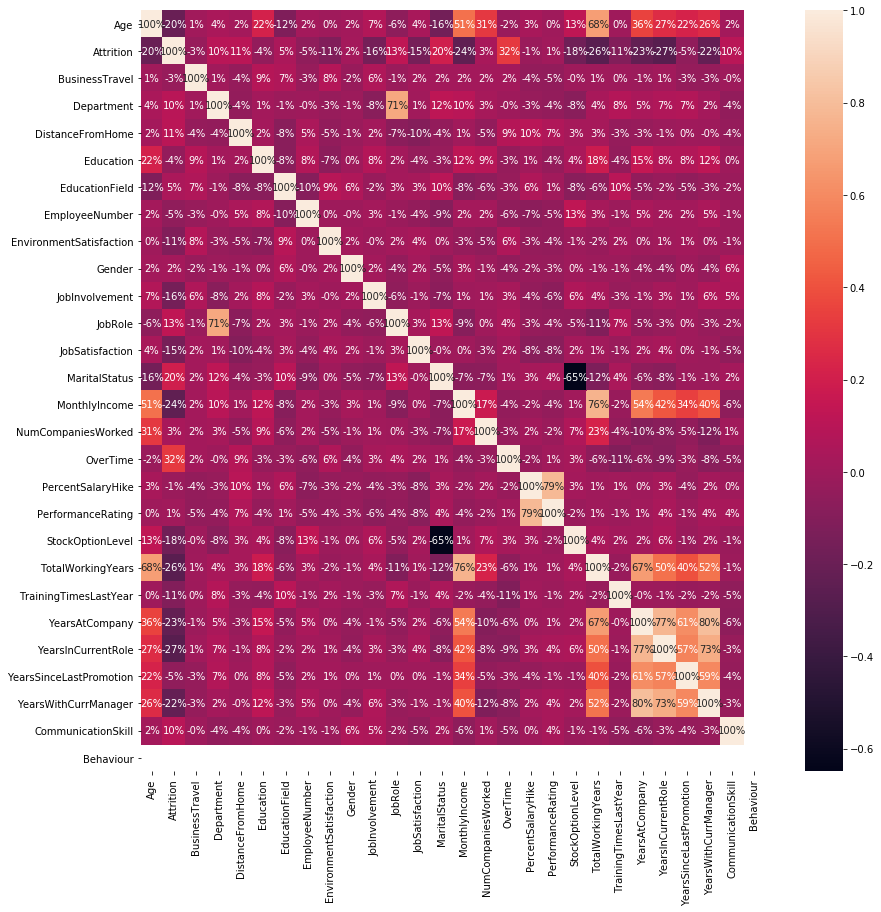

In [23]:
plt.figure(figsize=(14,14))  #14in by 14in
sns.heatmap(df.corr(), annot=True, fmt='.0%')

In [24]:
test_df=pd.read_csv('formulatedtest.csv')

In [25]:
test_df.shape

(470, 28)

In [26]:
test_df.head()

,Id,Age,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,...,PerformanceRating,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,CommunicationSkill,Behaviour
0,1,28,2,1,9,3,3,377,4,1,...,4,1,5,3,5,2,0,4,5,1
1,2,31,2,2,6,4,3,653,1,1,...,4,2,13,4,7,7,5,7,3,1
2,3,37,2,1,6,3,3,474,3,1,...,3,2,13,2,7,7,6,7,4,1
3,4,42,2,1,1,2,1,827,4,0,...,3,1,8,4,4,3,0,2,5,1
4,5,45,0,1,4,2,1,972,3,1,...,3,0,9,5,9,7,0,8,2,1


In [27]:
final_df=pd.concat([df,test_df],axis=0)

In [28]:
final_df.tail()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,...,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,CommunicationSkill,Behaviour,Id
465,32,NaN,2,1,2,4,1,1692,4,1,...,0,1,2,1,0,0,0,5,1,466.0
466,18,NaN,1,2,3,2,3,1624,2,0,...,0,0,2,0,0,0,0,2,1,467.0
467,24,NaN,2,1,23,3,3,639,2,1,...,2,6,3,6,5,1,4,1,1,468.0
468,31,NaN,2,1,23,3,3,367,2,1,...,1,10,2,9,0,7,8,3,1,469.0
469,36,NaN,2,1,5,4,1,1651,2,0,...,2,9,6,3,2,0,2,5,1,470.0


In [29]:
final_df.drop(['EmployeeNumber'],axis=1)
final_df.drop(['MaritalStatus'],axis=1)
final_df.drop(['Behaviour'],axis=1)
final_df.drop(['Id'],axis=1)

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,...,PerformanceRating,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,CommunicationSkill,Behaviour
0,30,0.0,0,1,2,3,3,571,3,0,...,3,0,12,2,11,7,6,7,4,1
1,36,0.0,2,1,12,4,1,1614,3,0,...,3,2,7,2,3,2,1,1,2,1
2,55,1.0,2,2,2,1,3,842,3,1,...,3,0,12,3,9,7,7,3,5,1
3,39,0.0,2,1,24,1,1,2014,1,1,...,3,0,18,2,7,7,1,7,4,1
4,37,0.0,2,1,3,3,4,689,3,1,...,3,1,10,2,10,7,7,8,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
465,32,NaN,2,1,2,4,1,1692,4,1,...,3,0,1,2,1,0,0,0,5,1
466,18,NaN,1,2,3,2,3,1624,2,0,...,3,0,0,2,0,0,0,0,2,1
467,24,NaN,2,1,23,3,3,639,2,1,...,3,2,6,3,6,5,1,4,1,1
468,31,NaN,2,1,23,3,3,367,2,1,...,4,1,10,2,9,0,7,8,3,1


In [30]:
final_df

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,...,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,CommunicationSkill,Behaviour,Id
0,30,0.0,0,1,2,3,3,571,3,0,...,0,12,2,11,7,6,7,4,1,NaN
1,36,0.0,2,1,12,4,1,1614,3,0,...,2,7,2,3,2,1,1,2,1,NaN
2,55,1.0,2,2,2,1,3,842,3,1,...,0,12,3,9,7,7,3,5,1,NaN
3,39,0.0,2,1,24,1,1,2014,1,1,...,0,18,2,7,7,1,7,4,1,NaN
4,37,0.0,2,1,3,3,4,689,3,1,...,1,10,2,10,7,7,8,1,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
465,32,NaN,2,1,2,4,1,1692,4,1,...,0,1,2,1,0,0,0,5,1,466.0
466,18,NaN,1,2,3,2,3,1624,2,0,...,0,0,2,0,0,0,0,2,1,467.0
467,24,NaN,2,1,23,3,3,639,2,1,...,2,6,3,6,5,1,4,1,1,468.0
468,31,NaN,2,1,23,3,3,367,2,1,...,1,10,2,9,0,7,8,3,1,469.0


# final_df=category_onehot_multcols(col_data)

In [31]:
final_df =final_df.loc[:,~final_df.columns.duplicated()]

In [32]:
#final_df['Attrition']=final_df['Attrition'].fillna(final_df['Attrition'])

In [33]:
final_df=final_df.drop(['Id'],axis = 1)


In [34]:
final_df

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,...,PerformanceRating,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,CommunicationSkill,Behaviour
0,30,0.0,0,1,2,3,3,571,3,0,...,3,0,12,2,11,7,6,7,4,1
1,36,0.0,2,1,12,4,1,1614,3,0,...,3,2,7,2,3,2,1,1,2,1
2,55,1.0,2,2,2,1,3,842,3,1,...,3,0,12,3,9,7,7,3,5,1
3,39,0.0,2,1,24,1,1,2014,1,1,...,3,0,18,2,7,7,1,7,4,1
4,37,0.0,2,1,3,3,4,689,3,1,...,3,1,10,2,10,7,7,8,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
465,32,NaN,2,1,2,4,1,1692,4,1,...,3,0,1,2,1,0,0,0,5,1
466,18,NaN,1,2,3,2,3,1624,2,0,...,3,0,0,2,0,0,0,0,2,1
467,24,NaN,2,1,23,3,3,639,2,1,...,3,2,6,3,6,5,1,4,1,1
468,31,NaN,2,1,23,3,3,367,2,1,...,4,1,10,2,9,0,7,8,3,1


In [35]:
final_df= final_df.drop(['Behaviour'],axis = 1)

In [36]:
final_df

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,...,PercentSalaryHike,PerformanceRating,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,CommunicationSkill
0,30,0.0,0,1,2,3,3,571,3,0,...,14,3,0,12,2,11,7,6,7,4
1,36,0.0,2,1,12,4,1,1614,3,0,...,12,3,2,7,2,3,2,1,1,2
2,55,1.0,2,2,2,1,3,842,3,1,...,16,3,0,12,3,9,7,7,3,5
3,39,0.0,2,1,24,1,1,2014,1,1,...,13,3,0,18,2,7,7,1,7,4
4,37,0.0,2,1,3,3,4,689,3,1,...,15,3,1,10,2,10,7,7,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
465,32,NaN,2,1,2,4,1,1692,4,1,...,12,3,0,1,2,1,0,0,0,5
466,18,NaN,1,2,3,2,3,1624,2,0,...,12,3,0,0,2,0,0,0,0,2
467,24,NaN,2,1,23,3,3,639,2,1,...,11,3,2,6,3,6,5,1,4,1
468,31,NaN,2,1,23,3,3,367,2,1,...,21,4,1,10,2,9,0,7,8,3


In [37]:
df_Train=final_df.iloc[:1628,:]
df_Test=final_df.iloc[1628:,:]
#df_Train = df.iloc[:, 1:df.shape[1]].values
#df_Test = df.iloc[:, 0].values


In [38]:
df_Train.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,...,PercentSalaryHike,PerformanceRating,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,CommunicationSkill
0,30,0.0,0,1,2,3,3,571,3,0,...,14,3,0,12,2,11,7,6,7,4
1,36,0.0,2,1,12,4,1,1614,3,0,...,12,3,2,7,2,3,2,1,1,2
2,55,1.0,2,2,2,1,3,842,3,1,...,16,3,0,12,3,9,7,7,3,5
3,39,0.0,2,1,24,1,1,2014,1,1,...,13,3,0,18,2,7,7,1,7,4
4,37,0.0,2,1,3,3,4,689,3,1,...,15,3,1,10,2,10,7,7,8,1


In [39]:
df_Train.tail()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,...,PercentSalaryHike,PerformanceRating,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,CommunicationSkill
1623,42,1.0,1,1,19,3,3,752,3,1,...,12,3,0,7,2,2,2,2,2,3
1624,55,1.0,2,2,2,1,3,842,3,1,...,16,3,0,12,3,9,7,7,3,5
1625,25,1.0,2,2,9,2,1,1439,1,1,...,12,3,0,6,2,3,2,2,2,5
1626,29,1.0,2,0,13,3,0,1844,1,1,...,15,3,3,4,3,2,2,2,0,5
1627,29,1.0,2,1,18,1,3,315,3,1,...,13,3,0,4,3,4,3,0,1,2


In [40]:
df_Train.shape

(1628, 27)

In [41]:
df_Test.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,...,PercentSalaryHike,PerformanceRating,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,CommunicationSkill
0,28,NaN,2,1,9,3,3,377,4,1,...,23,4,1,5,3,5,2,0,4,5
1,31,NaN,2,2,6,4,3,653,1,1,...,22,4,2,13,4,7,7,5,7,3
2,37,NaN,2,1,6,3,3,474,3,1,...,13,3,2,13,2,7,7,6,7,4
3,42,NaN,2,1,1,2,1,827,4,0,...,13,3,1,8,4,4,3,0,2,5
4,45,NaN,0,1,4,2,1,972,3,1,...,12,3,0,9,5,9,7,0,8,2


In [42]:
df_Test.dtypes

Age                          int64
Attrition                  float64
BusinessTravel               int64
Department                   int64
DistanceFromHome             int64
Education                    int64
EducationField               int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                       int64
JobInvolvement               int64
JobRole                      int64
JobSatisfaction              int64
MaritalStatus                int64
MonthlyIncome                int64
NumCompaniesWorked           int64
OverTime                     int64
PercentSalaryHike            int64
PerformanceRating            int64
StockOptionLevel             int64
TotalWorkingYears            int64
TrainingTimesLastYear        int64
YearsAtCompany               int64
YearsInCurrentRole           int64
YearsSinceLastPromotion      int64
YearsWithCurrManager         int64
CommunicationSkill           int64
dtype: object

In [43]:
df_Test.drop(['MaritalStatus'],axis=1)

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,...,PercentSalaryHike,PerformanceRating,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,CommunicationSkill
0,28,NaN,2,1,9,3,3,377,4,1,...,23,4,1,5,3,5,2,0,4,5
1,31,NaN,2,2,6,4,3,653,1,1,...,22,4,2,13,4,7,7,5,7,3
2,37,NaN,2,1,6,3,3,474,3,1,...,13,3,2,13,2,7,7,6,7,4
3,42,NaN,2,1,1,2,1,827,4,0,...,13,3,1,8,4,4,3,0,2,5
4,45,NaN,0,1,4,2,1,972,3,1,...,12,3,0,9,5,9,7,0,8,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
465,32,NaN,2,1,2,4,1,1692,4,1,...,12,3,0,1,2,1,0,0,0,5
466,18,NaN,1,2,3,2,3,1624,2,0,...,12,3,0,0,2,0,0,0,0,2
467,24,NaN,2,1,23,3,3,639,2,1,...,11,3,2,6,3,6,5,1,4,1
468,31,NaN,2,1,23,3,3,367,2,1,...,21,4,1,10,2,9,0,7,8,3


In [44]:
##df_Test.fillna(df_Test.mean())

In [45]:
#df_Test.drop(['Attrition'],axis=1,inplace=True)

In [46]:
X_train = df_Train.drop(['Attrition'],axis=1)
y_train = df_Train['Attrition']

In [47]:
X_train

,Age,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,JobInvolvement,...,PercentSalaryHike,PerformanceRating,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,CommunicationSkill
0,30,0,1,2,3,3,571,3,0,3,...,14,3,0,12,2,11,7,6,7,4
1,36,2,1,12,4,1,1614,3,0,3,...,12,3,2,7,2,3,2,1,1,2
2,55,2,2,2,1,3,842,3,1,3,...,16,3,0,12,3,9,7,7,3,5
3,39,2,1,24,1,1,2014,1,1,3,...,13,3,0,18,2,7,7,1,7,4
4,37,2,1,3,3,4,689,3,1,3,...,15,3,1,10,2,10,7,7,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1623,42,1,1,19,3,3,752,3,1,4,...,12,3,0,7,2,2,2,2,2,3
1624,55,2,2,2,1,3,842,3,1,3,...,16,3,0,12,3,9,7,7,3,5
1625,25,2,2,9,2,1,1439,1,1,2,...,12,3,0,6,2,3,2,2,2,5
1626,29,2,0,13,3,0,1844,1,1,2,...,15,3,3,4,3,2,2,2,0,5


In [48]:
y_train.tail()

1623    1.0
1624    1.0
1625    1.0
1626    1.0
1627    1.0
Name: Attrition, dtype: float64

In [49]:
y_train.dtypes

dtype('float64')

# from sklearn.preprocessing import StandardScaler

from sklearn import linear_model
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

from sklearn.model_selection import train_test_split
ridge = linear_model.Ridge()
lasso = linear_model.Lasso()
elastic = linear_model.ElasticNet()
lasso_lars = linear_model.LassoLars()
bayesian_ridge = linear_model.BayesianRidge()
logistic = linear_model.LogisticRegression(solver='liblinear')
sgd = linear_model.SGDClassifier()

# models = [ridge, lasso, elastic, lasso_lars, bayesian_ridge, logistic, sgd]



# from sklearn.model_selection import cross_val_score
def get_cv_scores(model):
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='roc_auc')
    print('CV Mean: ', np.mean(scores))
    print('STD: ', np.std(scores))
    print('\n')

# for model in models:
    print(model)
    get_cv_scores(model)

penalty = ['l1', 'l2']
C = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]
class_weight = [{1:0.5, 0:0.5}, {1:0.4, 0:0.6}, {1:0.6, 0:0.4}, {1:0.7, 0:0.3}]
solver = ['liblinear', 'saga']

param_grid = dict(penalty=penalty,
                  C=C,
                  class_weight=class_weight,
                  solver=solver)

grid = GridSearchCV(estimator=logistic, param_grid=param_grid, scoring='roc_auc', verbose=4, n_jobs=3)
grid_result = grid.fit(X_train, y_train)

print('Best Score: ', grid_result.best_score_)
print('Best Params: ', grid_result.best_params_)

In [49]:

#from sklearn.tree import DecisionTreeClassifier 


In [60]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [61]:
model = LogisticRegression()

In [66]:
model_params = {
    
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'C': [1,5,10]
        }
    }
}
    

In [67]:
scores = []

for model_name, mp in model_params.items():
    clf =  GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train,y_train)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    


In [68]:
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])


In [69]:
df

,model,best_score,best_params
0,logistic_regression,0.758614,{'C': 5}


In [73]:
import pickle
filename = 'finalized_model.pkl'
pickle.dump(model, open(filename, 'wb'))

In [80]:
dir(clf)

['__abstractmethods__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_check_is_fitted',
 '_estimator_type',
 '_format_results',
 '_get_param_names',
 '_get_tags',
 '_more_tags',
 '_pairwise',
 '_required_parameters',
 '_run_search',
 'best_estimator_',
 'best_index_',
 'best_params_',
 'best_score_',
 'classes_',
 'cv',
 'cv_results_',
 'decision_function',
 'error_score',
 'estimator',
 'fit',
 'get_params',
 'iid',
 'inverse_transform',
 'multimetric_',
 'n_jobs',
 'n_splits_',
 'param_grid',
 'pre_dispatch',
 'predict',
 'predict_log_proba',
 'predict_proba',
 'refit',
 'refit_time_',
 'return_train_score',
 'score

In [82]:
clf.best_params_

{'C': 5}

In [ ]:
model = LogisticRegression(C=5, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [83]:
model.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [84]:
a= df_Test.drop(['Attrition'],axis=1)

In [88]:
y_pred=model.predict_proba(a)

In [89]:
y_pred

array([[0.57796483, 0.42203517],
       [0.72517406, 0.27482594],
       [0.51947789, 0.48052211],
       [0.55046805, 0.44953195],
       [0.95303416, 0.04696584],
       [0.8293163 , 0.1706837 ],
       [0.38806253, 0.61193747],
       [0.92490033, 0.07509967],
       [0.39334538, 0.60665462],
       [0.79139103, 0.20860897],
       [0.90775568, 0.09224432],
       [0.74538501, 0.25461499],
       [0.91570885, 0.08429115],
       [0.79048118, 0.20951882],
       [0.89986534, 0.10013466],
       [0.50444279, 0.49555721],
       [0.65395554, 0.34604446],
       [0.43481833, 0.56518167],
       [0.89462338, 0.10537662],
       [0.93205516, 0.06794484],
       [0.86669621, 0.13330379],
       [0.09300833, 0.90699167],
       [0.89177379, 0.10822621],
       [0.68376056, 0.31623944],
       [0.66717964, 0.33282036],
       [0.73638068, 0.26361932],
       [0.81677185, 0.18322815],
       [0.89477981, 0.10522019],
       [0.26152344, 0.73847656],
       [0.47925341, 0.52074659],
       [0.

In [90]:
pred=pd.DataFrame(y_pred)

In [91]:
pred

,0,1
0,0.577965,0.422035
1,0.725174,0.274826
2,0.519478,0.480522
3,0.550468,0.449532
4,0.953034,0.046966
...,...,...
465,0.423627,0.576373
466,0.263850,0.736150
467,0.584976,0.415024
468,0.308719,0.691281


In [92]:
pre= pred[1]

In [93]:

sub_df=pd.read_csv('sample_submission.csv')

In [94]:

datasets=pd.concat([sub_df['Id'],pre],axis=1)

In [95]:
datasets.columns=['Id','Attrition']

In [96]:
datasets.to_csv('sample_submission.csv',index=False)

In [97]:
p = pd.read_csv('sample_submission.csv')

In [98]:
p

,Id,Attrition
0,1,0.422035
1,2,0.274826
2,3,0.480522
3,4,0.449532
4,5,0.046966
...,...,...
465,466,0.576373
466,467,0.736150
467,468,0.415024
468,469,0.691281


In [ ]:
entropy
max depth =3 
jobs= 3
random 1